# DS 3000 - Week 5 Assignment 

**Student Name**: Lauren Foster

**Date**: 6/7/24


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

## Instructions: 

Create a Python Notebook with your response to the following questions. Your work must be presented neatly; include your name in the notebook and indicate which question you are answering. Explain all results and all visualizations should have clearly labeled axes and a meaningful title. 
In this assignment, you will build a machine learning model to predict birth weight using the Babies dataset. Here is a link to the accompanying data dictionaryLinks to an external site.. Ensure that you explain each step and the results from each question. 
Data Source: babies.csvLinks to an external site.
In this assignment, you will build a machine learning model that predicts the birthweight. You will experiment with creating both the k-NN and Random Forest algorithms to determined which produces the best model.
Write python code to answer the questions below and ensure that you round the result of all numeric calculations to 2 decimal places. 


In [1]:
import csv
import pandas as pd
import numpy as np
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.spatial.distance as ssd
from sklearn.model_selection import train_test_split
from scipy.stats import f_oneway
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

### Question 1
load the data directly from the URL into a DataFrame.

In [2]:
# read data and turn into dataframe
baby_df = pd.read_csv("https://drive.google.com/uc?id=145n4_o1g5ZMrnV_DZt8tR9rjZLlJvU5K")
baby_df.head()

,case,bwt,gestation,parity,age,height,weight,smoke
0,1,120,284.0,0,27.0,62.0,100.0,0.0
1,2,113,282.0,0,33.0,64.0,135.0,0.0
2,3,128,279.0,0,28.0,64.0,115.0,1.0
3,4,123,NaN,0,36.0,69.0,190.0,0.0
4,5,108,282.0,0,23.0,67.0,125.0,1.0


### Question 2
(10 pts) Data Prep & EDA
Prepare the data for analysis. Ensure that you address the following:
    * Perform EDA using the dataset to demonstrate patterns.
    * Handle any missing data and invalid data. Justify your approach.
    * Plot a histogram of the birth weight and explain the overall distribution. 

In [3]:
# display dimensions, there are 1,236 rows and 8 columns
baby_df.shape

(1236, 8)

In [4]:
# check data types
baby_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   case       1236 non-null   int64  
 1   bwt        1236 non-null   int64  
 2   gestation  1223 non-null   float64
 3   parity     1236 non-null   int64  
 4   age        1234 non-null   float64
 5   height     1214 non-null   float64
 6   weight     1200 non-null   float64
 7   smoke      1226 non-null   float64
dtypes: float64(5), int64(3)
memory usage: 77.4 KB


In [5]:
# convert gestation, age, height, weight, and smoke to type int64
convert_to_int = ["gestation", "age", "height", "weight", "smoke"]
baby_df[convert_to_int] = baby_df[convert_to_int].astype(pd.Int64Dtype())

# convert parity and smoke to type category
convert_to_cat = ["parity", "smoke"]
baby_df[convert_to_cat] = baby_df[convert_to_cat].astype("category")

In [6]:
# check for missing data in columns
baby_df.isnull().sum()

case          0
bwt           0
gestation    13
parity        0
age           2
height       22
weight       36
smoke        10
dtype: int64

In [7]:
# look at rows with missing data 
baby_df.isnull().sum(axis = 1).sort_values(ascending = False)

154     3
399     3
363     2
508     2
185     2
       ..
427     0
426     0
425     0
424     0
1235    0
Length: 1236, dtype: int64

In [8]:
# dropping rows with 3 missing data points
baby_df = baby_df.drop(154)
baby_df = baby_df.drop(399)

In [9]:
# replacing remaining missing values with mean or mode
quant_col = ["gestation", "height", "weight", "age"]
baby_df[quant_col] = baby_df[quant_col].fillna(baby_df[quant_col].mean().astype(pd.Int64Dtype()))
baby_df["smoke"] = baby_df["smoke"].fillna(baby_df["smoke"].mode()[0])

In [10]:
baby_df.describe(include = "all")

,case,bwt,gestation,parity,age,height,weight,smoke
count,1234.000000,1234.000000,1234.0,1234.0,1234.0,1234.0,1234.0,1234.0
unique,NaN,NaN,<NA>,2.0,<NA>,<NA>,<NA>,2.0
top,NaN,NaN,<NA>,0.0,<NA>,<NA>,<NA>,0.0
freq,NaN,NaN,<NA>,920.0,<NA>,<NA>,<NA>,751.0
mean,619.052674,119.568071,279.329822,NaN,27.258509,64.047002,128.60859,NaN
std,356.937539,18.249216,15.954944,NaN,5.780139,2.512785,20.680945,NaN
min,1.000000,55.000000,148.0,NaN,15.0,53.0,87.0,NaN
25%,310.250000,108.250000,272.0,NaN,23.0,62.0,115.0,NaN
50%,619.500000,120.000000,280.0,NaN,26.0,64.0,126.0,NaN
75%,927.750000,131.000000,288.0,NaN,31.0,66.0,138.0,NaN


In [11]:
# print the rows where the gestation is 353 days and the birthweight is 176 ounces
print(baby_df[baby_df["gestation"] == 353])
print(baby_df[baby_df["bwt"] == 176])

      case  bwt  gestation parity  age  height  weight smoke
1172  1173  123        353      0   26      63     115     0
     case  bwt  gestation parity  age  height  weight smoke
632   633  176        293      1   19      68     180     0


From our investigation, we could tell that the rows 154 and 399 are a widespread issue because they are missing 3 data points so I deleted those rows. Apart from those two rows, the missing data was a isolated issue because they were only missing 2 or less data points. With these remaining rows, I performed imputation on the missing data with the mode or mean of that coulmn. I chose to imputate with the mode if the column was categorical and chose the mean if the column was quantitative. When checking for invalid data, I saw that the maximum gestation was 353 days which is over 11 months. However, when doing research, I found that the longest recorded pregnancy was 375 days, so I will keep this data entry. I also noticed that the largest birthweight was 176 ounces which is over 15 pounds. However, when doing research, I found that the largest recorded birthweight was 22 pounds so I chose to keep this data entry in as well. In addition, when printing the rows containing the outliers, the rest of the data in the rows seemed reasonable. I did not detect any invalid data yet.

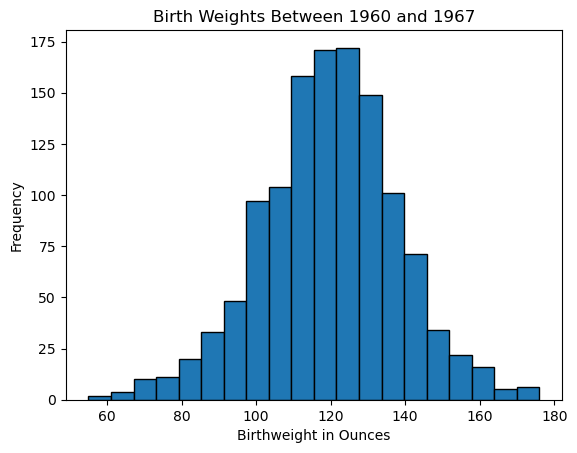

In [12]:
# histogram of the birth weight
plt.hist(baby_df["bwt"], bins = 20, edgecolor = "black")  
plt.title("Birth Weights Between 1960 and 1967")
plt.xlabel("Birthweight in Ounces")
plt.ylabel("Frequency")
plt.show()

The overall distribution of recorded birthweights of this study is approximately normal because it is symetrical and has a bell shaped curve. We can see that most birthweights fall between 110 and 130 ounces. We can estimate that the median birthweight is around 125 ounces.

### Question 3
(5 pts) Feature Selection
Demonstrate which features are useful to build the model. Briefly explain the reason for the features that you selected.  Note: You can explore correlations, test hypothesis and/or other techniques. Remember that Data Science relies heavily on experimentation. Therefore, you are encouraged to experiment with your data.
    * Tip #1: ensure that you carefully consider each feature and share the pros and cons of your decisions.
    * Tip #2: you are predicting the birth weight, therefore it should not be one of your explanatory variables.


In [13]:
# look at the correlation between birthweight and each feature column, looking for values close to 1 or -1
features = ["gestation", "parity", "age", "height", "weight", "smoke"]
for col in features:
    print(col + ":")
    print(baby_df["bwt"].corr(baby_df[col]))

gestation:
0.4059862694756101
parity:
-0.04603731723138955
age:
0.033974833632345436
height:
0.19729173604549782
weight:
0.15270164956306237
smoke:
-0.24132927934096413


In [14]:
# ANOVA test
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.f_oneway.html 
features = ["gestation", "parity", "age", "height", "weight", "smoke"]
for feature in features:
    feature_groups = []
    for category in baby_df["bwt"].unique():
        feature_values = baby_df.loc[baby_df["bwt"] == category, feature]
        feature_groups.append(feature_values)
    anova_result = f_oneway(*feature_groups)
    print(feature + ":")
    print("ANOVA F-statistic:", anova_result.statistic)
    print("ANOVA p-value:", anova_result.pvalue)

gestation:
ANOVA F-statistic: 3.5296770829427127
ANOVA p-value: 6.013913856331064e-26
parity:
ANOVA F-statistic: 0.9802909630882053
ANOVA p-value: 0.5391836641142597
age:
ANOVA F-statistic: 0.8712397034222965
ANOVA p-value: 0.816186572620483
height:
ANOVA F-statistic: 1.5451237180958952
ANOVA p-value: 0.000568823503898319
weight:
ANOVA F-statistic: 1.3491019016712678
ANOVA p-value: 0.013537034824858973
smoke:
ANOVA F-statistic: 1.7095669186645266
ANOVA p-value: 2.48161752900513e-05


I started with "gestation", "parity", "age", "height", "weight", "smoke" as possible features because the case number has no impact on birthweight. Parity and age both have a correlation between 0.1 and -0.1, indicating they are not useful in predicting birthweight since they have very little correlation. I also ran an ANOVA test and looked for features with a high f statistic and low p value. Parity and age both had a relatively low f statistic and high p value (well above 0.05), indicating I should discard them as useful features for predicting birthweight. Both tests results indicated that age and parity were not useful, leaving me with gestation, height, weight, and smoke as useful features. These features have a higher correlation, higher f statstics, and lower p values.

### Question 4
Data Partitioning
(2 pts) Partition the prepared data into train/test sets, ensure that your partitions are reproducible. Encode any categorical variables in your training set. Then, use the appropriate approach to encode your test set.

In [15]:
# train test split with quantitative data
X = baby_df[["gestation", "height", "weight", "smoke"]]
y = baby_df["bwt"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

# encode "smoke" (categorical variable) in the training and testing sets using dummy encoding
X_train_encoded = pd.get_dummies(X_train, columns=["smoke"], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=["smoke"], drop_first=True)

### Question 5
Model Development
(5 pts) Using the Random Forest algorithm, build a machine learning model that predicts the birth weight.  
Think about the following: Are you performing classification or regression? Ensure that you choose the appropriate Random Forest Classifier/Regressor from scikit-learn.

In [16]:
# predicting birthweight with a Random Forest Regressor
rfr = RandomForestRegressor(random_state = 42)
rfr.fit(X_train_encoded, y_train)
y_pred = rfr.predict(X_test_encoded)

I am using a regressor because we are predicting weight which is a quantitative and continous value (not discrete or categorical)

### Question 6
Model Evaluation
(5 pts) Evaluate the predictions from your model and comment on the results. Ensure that you choose the appropriate metric to evaluate the model and round your calculations to two decimal places. Remember that we evaluate models differently depending on the task, i.e. classification or regression.

In [17]:
# evaluate model with mean squared error and root mean squared error
mse = round(mean_squared_error(y_test, y_pred), 2)
print("MSE:", mse)
print("RMSE:", round(mse**0.5, 2))

MSE: 340.41
RMSE: 18.45


### Question 7
Model Tuning
(5 pts) What are your thoughts on the model's prediction capability? Did it do a good job of predicting the birth weight?
Note: it is okay if your first version of the model is not the best. However, there are strategies that we can use to improve it, such as tuning.
Tune the model: you can control the number of trees in your forest using the n_estimators parameter. Refer to the sample code from the lecture and also view the documentation**Links to an external site. to learn more about this algorithm and its parameters. Try at least five different values for the n_estimators parameter to determine if the model improved. Show all your steps to create, evaluate and tune each version of the model.
Indicate which model performed the best.

A MSE of 340.41 means that the average predicted result is roughly 18.45 (the rmse) ounces off from the actual value which is over 1 pound. For comparision, the standard deviation of the birthweight in the data set is 18.25 ounces which is less than the rmse. Therefore, model's prediction capability is worse than predicting the birthweight by simply using the average birthweight of the dataset. This model has potential for improvement.

In [18]:
def evaluate_model(n):
    '''calculates the mse of the random forest regressor given n_estimators'''
    rfr = RandomForestRegressor(n_estimators = n, random_state = 42)
    rfr.fit(X_train_encoded, y_train)
    y_pred = rfr.predict(X_test_encoded)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    return mse

In [19]:
# testing n_estimator values
n_test_values = [30, 80, 100, 120, 200, 300]
mse_results = {}
for n in n_test_values:
    mse = evaluate_model(n)
    mse_results[n] = mse
    print(f"n_estimators: {n}, MSE: {mse}")

# find optimal n value (has lowest MSE)
best_n = min(mse_results, key = mse_results.get)
best_mse = mse_results[best_n]

print(f"Best model: n_estimators = {best_n}, MSE = {best_mse}")

n_estimators: 30, MSE: 346.34
n_estimators: 80, MSE: 341.23
n_estimators: 100, MSE: 340.41
n_estimators: 120, MSE: 341.58
n_estimators: 200, MSE: 341.32
n_estimators: 300, MSE: 341.37
Best model: n_estimators = 100, MSE = 340.41


The lowest MSE found with the test values was 340.41 which is matches the origional MSE. Given that there were no other n_estimatos values that led to a lower MSE we can assume that a n_estimators value of 10 is optimal for this random forest regression model. 

### Question 8
(15 pts) Perform steps 5-7 using the k-nn algorithm. Perform model tuning using at least 5 different values of k. Show all your steps to create, evaluate and tune each version of the model. Indicate which model performed the best.

In [20]:
# normalize features
scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train_encoded)
X_test_norm = scaler.transform(X_test_encoded)

# creating a KNN Regressor
knn_regressor = KNeighborsRegressor(n_neighbors = 5)
knn_regressor.fit(X_train_norm, y_train)
new_y_pred = knn_regressor.predict(X_test_norm)

In [21]:
# evaluate knn model with mean squared error and rmse
knn_mse = round(mean_squared_error(y_test, new_y_pred), 2)
knn_rmse = round(mse**0.5, 2)
print("MSE:", knn_mse)
print("RMSE:", knn_rmse)

MSE: 342.56
RMSE: 18.48


This MSE of 342.56 is very similar to the first random forest regressor model. It is slightly higher by 2 but makes an insignificant impact on the RMSE. The RMSE is still sightly greater than the standard deviation (18.25) which indicates that this knn regression model is not better at predicting birthweight than if we were to guess using the average birthweight.

In [22]:
def optimal_neighbors(k):
    '''calculates the mse of the knn regressor given n_neighbors'''
    knn_regressor = KNeighborsRegressor(n_neighbors = k)
    knn_regressor.fit(X_train_norm, y_train)
    y_pred = knn_regressor.predict(X_test_norm)
    mse = round(mean_squared_error(y_test, y_pred), 2)
    return mse

In [23]:
# testing neighbor values
k_test_values = [2, 4, 6, 8, 10, 12]
new_mse_results = {}
for k in k_test_values:
    mse = optimal_neighbors(k)
    new_mse_results[k] = mse
    print(f"n_neighbors: {k}, MSE: {mse}")

# find optimal n value (has lowest MSE)
best_k = min(new_mse_results, key = new_mse_results.get)
best_new_mse = new_mse_results[best_k]

print(f"Best model: n_neighbors = {best_k}, MSE = {best_new_mse}")

n_neighbors: 2, MSE: 442.87
n_neighbors: 4, MSE: 346.61
n_neighbors: 6, MSE: 327.5
n_neighbors: 8, MSE: 324.19
n_neighbors: 10, MSE: 316.91
n_neighbors: 12, MSE: 307.36
Best model: n_neighbors = 12, MSE = 307.36


Here we see a much better decrease in the MSE. The MSE when n_neighbors is 12 is 307.36 which is over 35 less than the origional knn regressor. This optimal knn regressor has a RMSE of 17.5 which means the average error in ounces has decreased and is now less than the standard deviation. This model is more effective than predicting birthweight with the average but not by much.

### Question 9
(3 pts) Compare both the best model from both the Random Forest and k-NN algorithms and explain which model is the most suitable to predict birthweight. Justify your response.

The best random forest regression model had a MSE of 340.41 and a RMSE of 18.45. The best knn regressor had a MSE of 307.36 and a RMSE of 17.5. Since the MSE and RMSE values are lower for the knn regressor, the knn regressor is the most suitable to predict birthweight.

### Question 10
(+5 bonus points) The Random forest has a method that returns the importance of each feature in your model. Review the documentation to learn about feature importance. After which, write the appropriate code that demonstrates which features were the most important when making the predictions. Visualize the feature importance using the best model and explain the results.

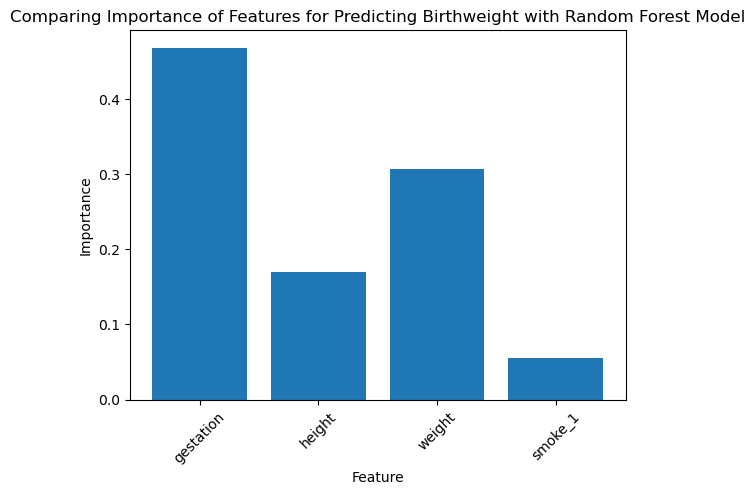

In [24]:
# use the best fit random forest regressin model
best_rfr = RandomForestRegressor(n_estimators = best_n, random_state = 42)
best_rfr.fit(X_train_encoded, y_train)

# fetch and visualize feature importances
feature_importances = best_rfr.feature_importances_
feature_names = X_train_encoded.columns
plt.bar(feature_names, feature_importances)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Comparing Importance of Features for Predicting Birthweight with Random Forest Model")
plt.xticks(rotation=45)
plt.show()

As seen in the graph, gestation has the most significant impact on predicting the birthweight with the Random Forest Model, followed by weight of the mother. Whether or not the mother smoked has the least significant impact.